<a href="https://colab.research.google.com/github/Franulo/DeepLearningJourney/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
xn, yn = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
import pandas as pd
circles = pd.DataFrame({"x0":xn[:, 0], "x1":xn[:, 1], "label":yn})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


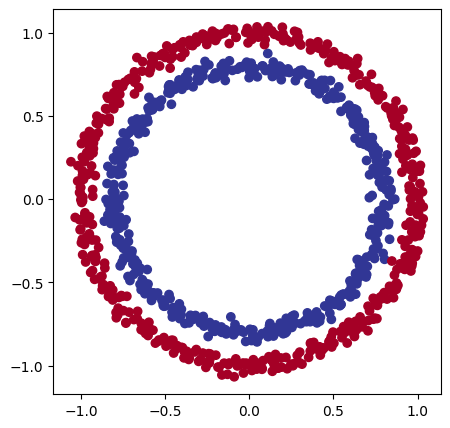

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(xn[:, 0], xn[:, 1], c=yn, cmap=plt.cm.RdYlBu)

## Input and output shape

In [4]:
# Check the shapes of our features and labels
xn.shape, yn.shape

((1000, 2), (1000,))

In [5]:
# How many samples are we working with
len(xn), len(yn)

(1000, 1000)

In [6]:
# View the first examples of features and labels
xn[0], yn[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [7]:
import tensorflow as tf

In [8]:
x = tf.convert_to_tensor(xn)
y = tf.convert_to_tensor(yn)

In [9]:
x.shape

TensorShape([1000, 2])

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 4s 5ms/step - loss: 1.9787 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.4600
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4540
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4300
Epoch 11/

In [11]:
a = model.predict(x)
a.shape

32/32 [==============================] - 0s 3ms/step


(1000, 1)

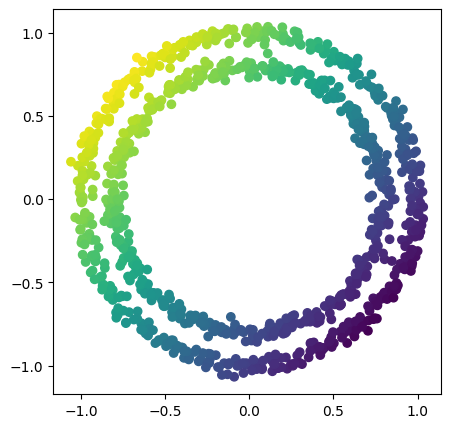

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=a)

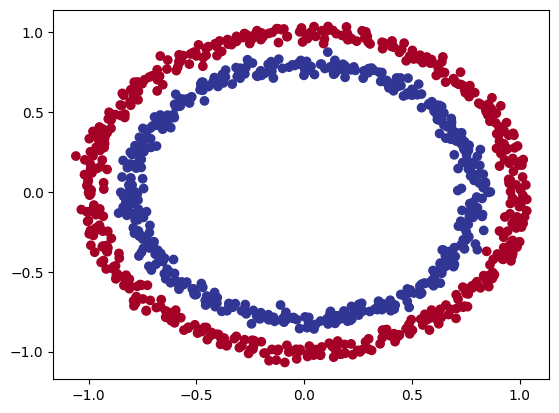

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='RdYlBu')

To visulize our model's predictions, let's ccreate a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model=model, x=x, y=y):
  x_min, x_max = xn[:, 0].min() - 0.1, xn[:, 0].max() + 0.1
  y_min, y_max = xn[:, 1].min() - 0.1, xn[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacks 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundrary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


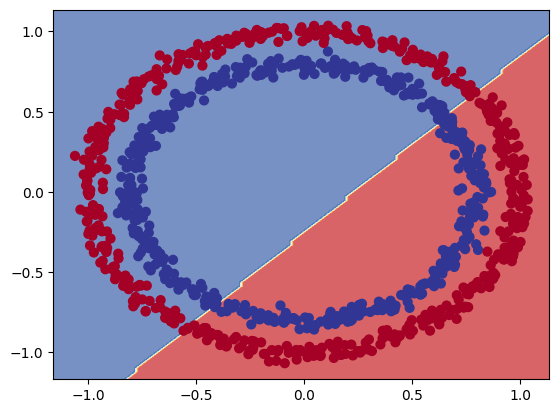

In [16]:
plot_decision_boundary()

## The missing piece: Non-linearity

In [17]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model_1.fit(x, y, epochs=210, verbose=0)

(0.0, 1.0)

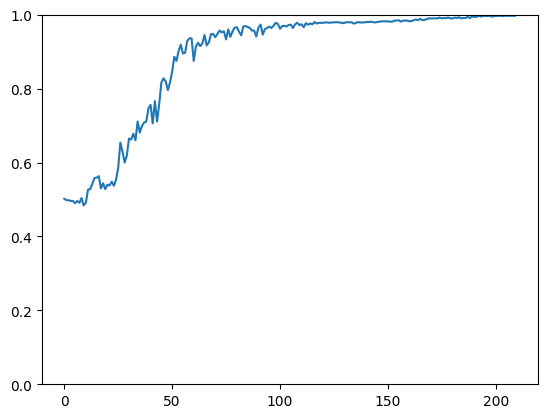

In [18]:
plt.plot(history.history['accuracy'])
plt.ylim([0, 1])

313/313 [==============================] - 0s 921us/step
doing binary classification


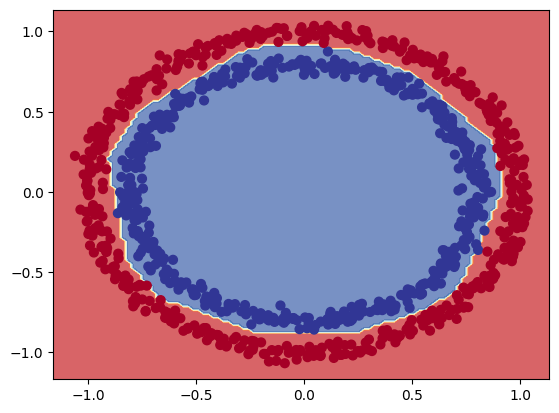

In [19]:
plot_decision_boundary(model=model_1)

In [20]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.9970


[0.3002914786338806, 0.996999979019165]

In [21]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

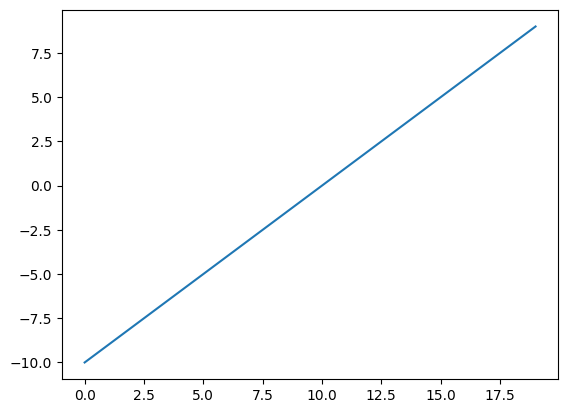

In [22]:
# Visulize out toy tensor
plt.plot(A)

In [23]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1+ exp(-x))
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

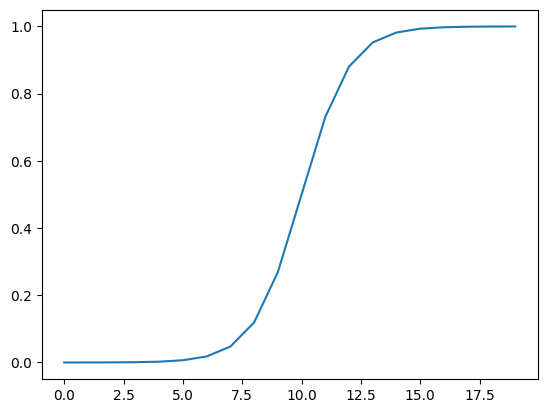

In [24]:
plt.plot(sigmoid(A))

In [25]:
# Let's create the relu function
def relu(x):
  return tf.maximum(0, x)

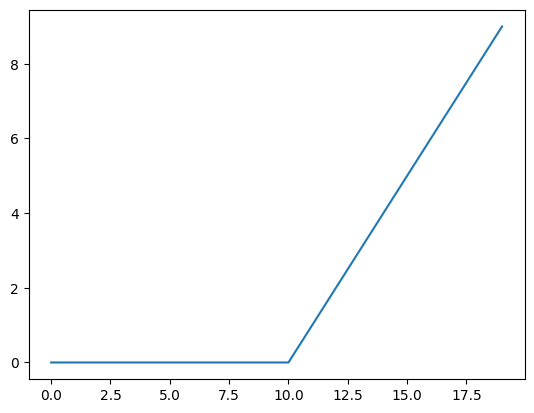

In [26]:
plt.plot(relu(A))

In [27]:
tf.keras.activations.linear(A), tf.keras.activations.sigmoid(A), tf.keras.activations.relu(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
        2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
        8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>)

## Evaluating and improving our classificiation

In [28]:
# Check how many examples we have
len(x)

1000

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x.shape, y.shape

(TensorShape([1000, 2]), TensorShape([1000]))

In [31]:
x_train, x_test = train_test_split(np.reshape(x, (1000, 2)), test_size=0.33, random_state=42)
y_train, y_test = train_test_split(np.reshape(y, (1000, 1)), test_size=0.33, random_state=42)

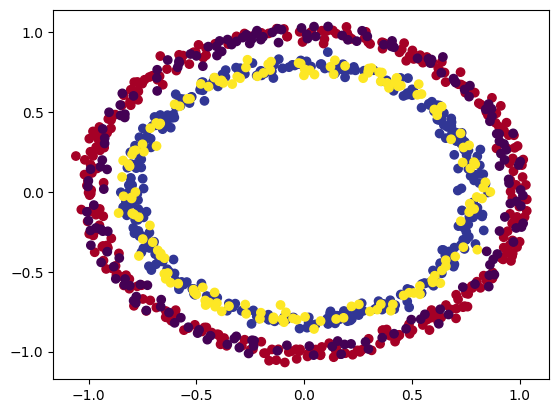

In [32]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='RdYlBu')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

In [33]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_2.fit(x_train, y_train, epochs=230, verbose=0)

(0.0, 1.0)

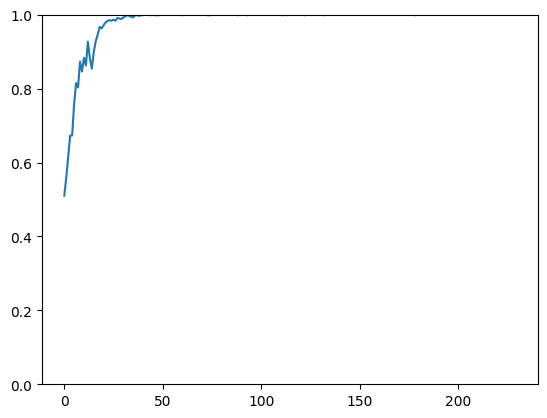

In [34]:
plt.plot(history.history['accuracy'])
plt.ylim(0, 1)

In [35]:
model_2.evaluate(x_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 1.0000


[0.01512921042740345, 1.0]

313/313 [==============================] - 0s 800us/step
doing binary classification
313/313 [==============================] - 0s 944us/step
doing binary classification


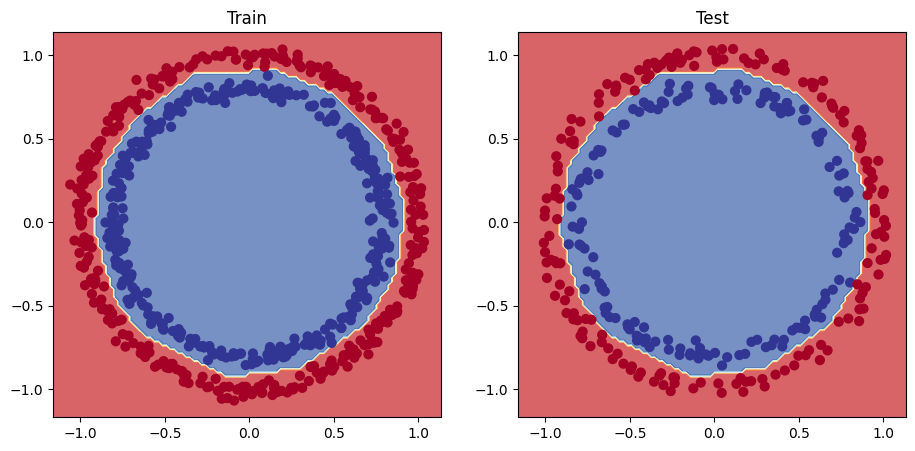

In [36]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, x_test, y_test)

## Plot the loss (or training) curves

In [37]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692638,0.510448
1,0.682861,0.558209
2,0.676132,0.616418
3,0.669743,0.673134
4,0.662882,0.673134
...,...,...
225,0.005951,1.000000
226,0.005786,1.000000
227,0.006139,1.000000
228,0.005976,1.000000


Text(0.5, 1.0, 'Model_2 loss curves')

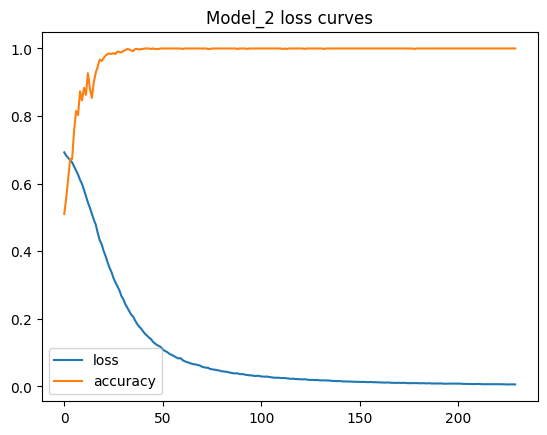

In [38]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_2 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where teh loss decreases the most during training) we're going to use the following steps:

* A learning rate ** callback** - you can think of a callback as an extra piece of funtionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [39]:
# Without learning rate callback
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_3.fit(x_train, y_train, epochs=100, verbose=0)

In [40]:
model_3.evaluate(x_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9848


[0.03829743713140488, 0.9848484992980957]

(0.0, 1.0)

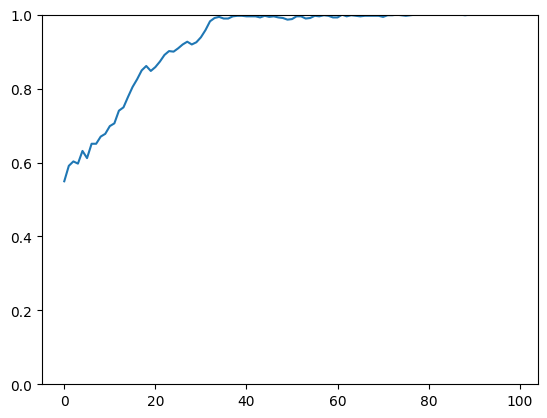

In [41]:
plt.plot(history.history['accuracy'])
plt.ylim(0, 1)

In [42]:
# With learning rate callback
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_4.fit(x_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

In [43]:
model_4.evaluate(x_train, y_train), model_4.evaluate(x_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.7147 - accuracy: 0.4727


([0.7016289830207825, 0.5134328603744507],
 [0.7146762013435364, 0.4727272689342499])

<Axes: xlabel='epochs'>

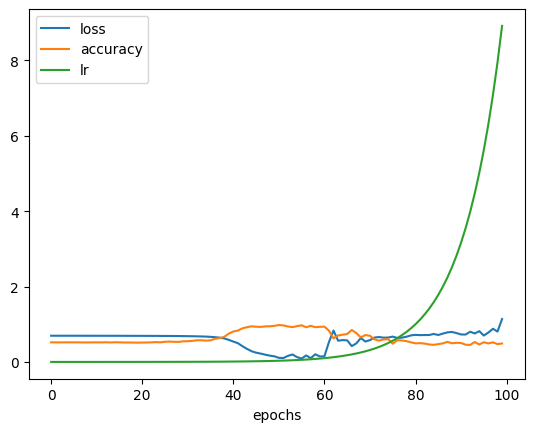

In [44]:
pd.DataFrame(history.history).plot(xlabel="epochs")

Text(0, 0.5, 'Loss')

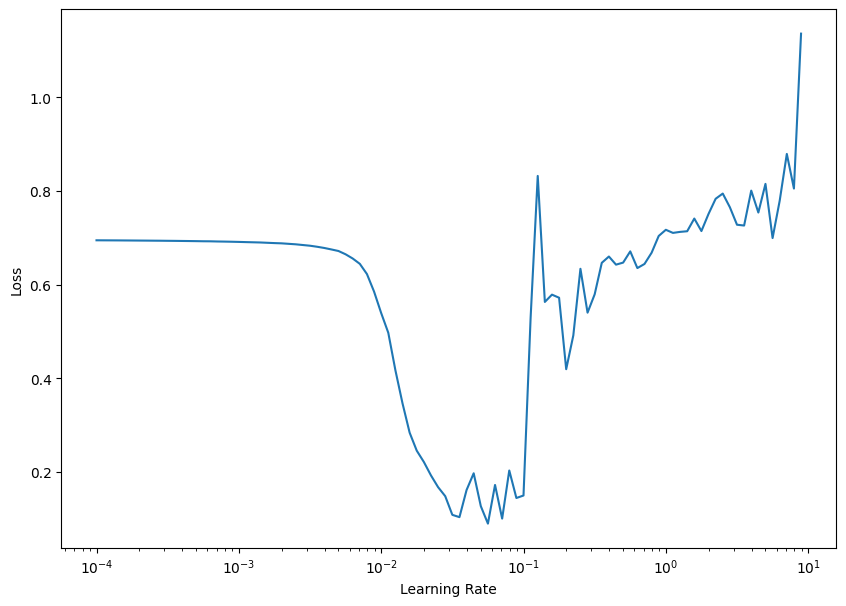

In [45]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Good learning rate: 10**-2

In [46]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

## More classification methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [47]:
loss, accuracy = model_3.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

11/11 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9848
Model loss on the test set: 0.03829743713140488
Model accuracy on the test set: 98.48%


How about a confusion matrix?

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
# Make predictions
y_preds = model_3.predict(x_test)

11/11 [==============================] - 0s 1ms/step


In [50]:
y_test[:5]

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [51]:
y_preds[:5]

array([[9.9909657e-01],
       [6.9305012e-03],
       [9.9985170e-01],
       [4.6710807e-04],
       [9.1952080e-01]], dtype=float32)

In [52]:
tf.round(y_preds[:5])

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

Oops...looks like our predictions array has come out in prediction probability form...the standard output from the sigmoid (or softmax) activation fuctions.

In [53]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[170,   4],
       [  1, 155]])

How about we prettify our confusion matrix?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x_axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.2f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [55]:
def plot_confusion_matrix(figsize, y_test, y_preds, _classes):

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = _classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # Set x_axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.2f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)